Introduction to regression with neural networks

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np 
import sklearn as sk
print(tf.__version__)

2.9.2


what are regression problems?
- this generally involves predicting numbers 
- generally predicting
- in a neural network regression we are generally going to be modeling and predicting teh relationships bewteent eh dependent vaiables and independent variables (set number (data)) 

- we generally need inputs and outputs 
the input will be the independent variables that are known  
we need to  encode the independent variabbles into a neumerically encoded tensor
- often an algorithms that we feed the input data into is gnenrally already made 


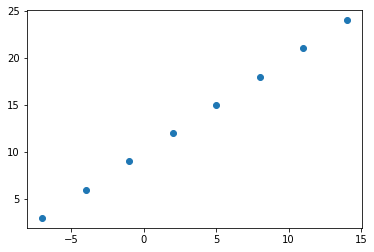

In [3]:
# first we will create the featuers 
X = np.array([-7.0, - 4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# creating lables (dependent variables)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualisation of this data isiong a scatter plot
plt.scatter(X,y)

In [4]:
# the relationship seen :
X + 10, y== X+10

(array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 array([ True,  True,  True,  True,  True,  True,  True,  True]))

input and output shapes of the model

In [5]:
# lets create a demo tensor for out housing problem 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2022-06-27 18:06:52.094452: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-27 18:06:52.094584: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



notice the input shape is 3 and the output shape is 1 


In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape 
# notice that the output is 8 and 8 because there are correlated with 8 differnet inputs 

((8,), (8,))

In [7]:
X[0], y[0]
# notcie that we are using X 0 to preduct Y 0 
#so we want to use one input feature to predct one output feature 
# we want to build a model that takes one X value to predicting one y value 

(-7.0, 3.0)

lets turn out numpy arrays into tensors


In [8]:
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y



(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

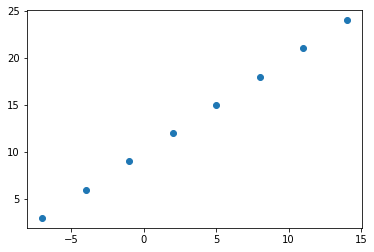

In [9]:
plt.scatter(X,y)

Steps in modeling 
- creating a model where we are defining the nput, output and hidden laters of a deep earning model 
- copiling  amodel and deifning the loss function(a function that tells out model how wrong out model is )
- the optimizer(tells out model how to improve our pattern)
- fitting a model- letting the model try and dind patterns between X and y (features and lables)



In [11]:
# first we need to set the seed 
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 


Epoch 1/5
1/1 [==============================] - 0s 160ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


2022-06-27 22:39:48.038077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


the tf.keras.losses.MAE function is beased on teh application of the loss function withwhich easure sthe mean (abs(y_true  -y_pred), axis = -1).
we are calculating teh differnce bteween teh f=true value and the preducted value and getting the absoliuete value of themse 2 and generating a mean of that laong a specifc axis
on average how wrong are our preductions 
SGD - this is stochastic gradient descent which is used to optimize, so that we are using stochastic approximation for gradient descent optimization and generates preductive vlues to fill in data 

there are multiple ways to add layers to our model in tensorflow
we are able to use either:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1), 
])

or we can use the term:
model .add(tf.keras.layers.Dense(1)) where 1 is the number of layers 

In [13]:
# now we want to try and predict using using the model 
y_pred = model.predict([17.0])
y_pred
# our model realizes that there is a differnce of about + 11 in the y values so thus it is going to predict an addition of about 12 but this isnt quite accurate 

1/1 [==============================] - 0s 219ms/step


2022-06-27 23:02:54.679298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[12.716021]], dtype=float32)

In order to improve the model we need to:
- by adding more layers to the
- within each of teh hidden laeer we can change the actiavtion function of each layer 
- we could change the ptimization function or the lernaing rate of the optimization function
- when we are fitting the model we might increase the number of epochs which will allow the model to run more examples to learn from.


In tensorflow ther ear e2 differnet models we are able to use for generating predictions
- the smaller models use the SGD where as the larger models have more layers 
- the number of neurons in each layer is increased in larger models 
- larger models also use the Adam optimizer with an lr (learning rate) the higher the learning rate the more that the optimizer is pushig the model to learn, the lower the learning rate, teh smaller the steps the optimizer tells the model to take to improve 
- there is also a differnce in the subset in the smaller model but in the larger model uses X_train_full and y_train_full


In [15]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/100
1/1 [==============================] - 0s 179ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 1

2022-06-28 16:45:01.261022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 9ms/step - loss: 8.5898 - mae: 8.5898
Epoch 24/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4573 - mae: 8.4573
Epoch 25/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3248 - mae: 8.3248
Epoch 26/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1923 - mae: 8.1923
Epoch 27/100
1/1 [==============================] - 0s 4ms/step - loss: 8.0598 - mae: 8.0598
Epoch 28/100
1/1 [==============================] - 0s 3ms/step - loss: 7.9273 - mae: 7.9273
Epoch 29/100
1/1 [==============================] - 0s 3ms/step - loss: 7.7948 - mae: 7.7948
Epoch 30/100
1/1 [==============================] - 0s 3ms/step - loss: 7.6623 - mae: 7.6623
Epoch 31/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5298 - mae: 7.5298
Epoch 32/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3973 - mae: 7.3973
Epoch 33/100
1/1 [==============================] - 0s 4ms/step - loss: 7.2648 - ma

In [16]:
X ,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# now lets predict again to see if the prediction has improved 
model.predict([17.0])

1/1 [==============================] - 0s 68ms/step


2022-06-28 16:47:54.503326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[30.158512]], dtype=float32)

now lets try and reqrite the code so that we are going to optimize with the addition of another parameter 